In [1]:
# Install medmnist library
!pip install medmnist
import numpy as np
from medmnist import PathMNIST, PneumoniaMNIST

# Load PathMNIST dataset
pathmnist_train = PathMNIST(root='./', split='train', download=True)
pathmnist_test = PathMNIST(root='./', split='test', download=True)

# Load PneumoniaMNIST dataset
pneumoniamnist_train = PneumoniaMNIST(root='./', split='train', download=True)
pneumoniamnist_test = PneumoniaMNIST(root='./', split='test', download=True)

# Verifying data not missing
print("PathMNIST Train samples:", len(pathmnist_train))
print("PathMNIST Test samples:", len(pathmnist_test))
print("PneumoniaMNIST Train samples:", len(pneumoniamnist_train))
print("PneumoniaMNIST Test samples:", len(pneumoniamnist_test))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached 

100%|██████████| 205615438/205615438 [00:11<00:00, 17206479.23it/s]


Using downloaded and verified file: ./pathmnist.npz


100%|██████████| 4170669/4170669 [00:01<00:00, 4160486.76it/s]


Using downloaded and verified file: ./pneumoniamnist.npz
PathMNIST Train samples: 89996
PathMNIST Test samples: 7180
PneumoniaMNIST Train samples: 4708
PneumoniaMNIST Test samples: 624


In [ ]:
print(dir(pathmnist_train))
print("----------------------------------------------------------------------------------------------------")
print(dir(pneumoniamnist_train))

['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', 'as_rgb', 'available_sizes', 'download', 'flag', 'imgs', 'info', 'labels', 'montage', 'root', 'save', 'size', 'size_flag', 'split', 'target_transform', 'transform']
----------------------------------------------------------------------------------------------------
['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__',

In [ ]:
images = pathmnist_train.imgs
print(images)


[[[[220 208 227]
   [219 207 227]
   [220 207 227]
   ...
   [220 208 227]
   [219 207 227]
   [221 208 227]]

  [[218 206 226]
   [220 207 226]
   [219 206 226]
   ...
   [197 177 202]
   [192 172 197]
   [190 168 195]]

  [[220 208 226]
   [220 207 226]
   [219 205 225]
   ...
   [208 191 213]
   [207 192 213]
   [209 194 216]]

  ...

  [[218 205 225]
   [217 201 222]
   [221 208 227]
   ...
   [221 208 227]
   [220 208 227]
   [221 209 227]]

  [[213 192 218]
   [217 200 222]
   [221 208 227]
   ...
   [221 208 227]
   [221 209 227]
   [221 208 227]]

  [[215 195 220]
   [220 207 226]
   [221 208 227]
   ...
   [220 208 227]
   [221 208 227]
   [222 209 228]]]


 [[[126  59 119]
   [142  84 139]
   [174 127 176]
   ...
   [117  59 112]
   [155  96 145]
   [203 149 191]]

  [[186 139 182]
   [173 120 170]
   [157  93 148]
   ...
   [197 163 197]
   [199 157 195]
   [197 147 190]]

  [[188 152 186]
   [201 170 203]
   [195 150 189]
   ...
   [208 181 211]
   [209 182 212]
   [201 167

**b)Normalised and formatted the data.**

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Reshape the image data to 2D arrays
pathmnist_train_images = pathmnist_train.imgs.reshape(len(pathmnist_train), -1)
pathmnist_test_images = pathmnist_test.imgs.reshape(len(pathmnist_test), -1)

# Normalize the pixel values
pathmnist_train_images_normalized = scaler.fit_transform(pathmnist_train_images)
pathmnist_test_images_normalized = scaler.transform(pathmnist_test_images)

# Reshape the normalized data back to its original shape
pathmnist_train_images_normalized = pathmnist_train_images_normalized.reshape(-1, 28, 28, 3)
pathmnist_test_images_normalized = pathmnist_test_images_normalized.reshape(-1, 28, 28, 3)

# for pneumonia
pneumoniamnist_train_images = pneumoniamnist_train.imgs.reshape(len(pneumoniamnist_train), -1)
pneumoniamnist_test_images = pneumoniamnist_test.imgs.reshape(len(pneumoniamnist_test), -1)

#for pneumonia
pneumoniamnist_train_images_normalized = scaler.fit_transform(pneumoniamnist_train_images)
pneumoniamnist_test_images_normalized = scaler.transform(pneumoniamnist_test_images)

# for pneumonia
pneumoniamnist_train_images_normalized = pneumoniamnist_train_images_normalized.reshape(-1, 28, 28, 1)
pneumoniamnist_test_images_normalized = pneumoniamnist_test_images_normalized.reshape(-1, 28, 28, 1)

# Print the shape of the normalized and reshaped images for PathMNIST dataset
print("PathMNIST Train Images Shape (normalized):", pathmnist_train_images_normalized.shape)
print("PathMNIST Test Images Shape (normalized):", pathmnist_test_images_normalized.shape)

# Print the shape of the normalized and reshaped images for PneumoniaMNIST dataset
print("PneumoniaMNIST Train Images Shape (normalized):", pneumoniamnist_train_images_normalized.shape)
print("PneumoniaMNIST Test Images Shape (normalized):", pneumoniamnist_test_images_normalized.shape)


PathMNIST Train Images Shape (normalized): (89996, 28, 28, 3)
PathMNIST Test Images Shape (normalized): (7180, 28, 28, 3)
PneumoniaMNIST Train Images Shape (normalized): (4708, 28, 28, 1)
PneumoniaMNIST Test Images Shape (normalized): (624, 28, 28, 1)


**c)Visualise a subset of the data and the ground truth**

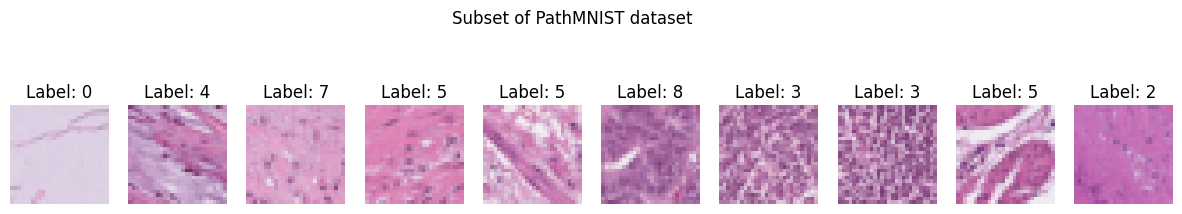

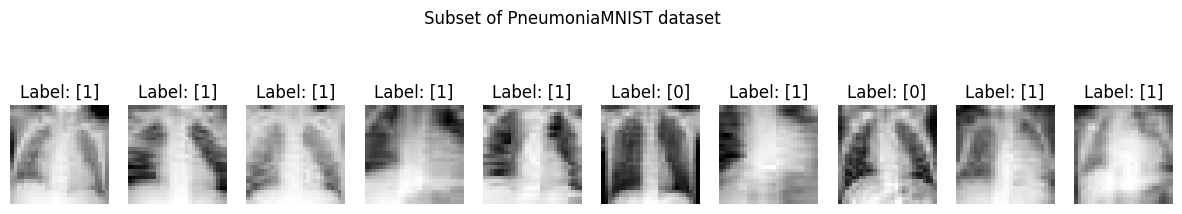

In [ ]:
import matplotlib.pyplot as plt

# subset of images and their ground truth labels for PathMNIST dataset
num_images_to_visualize = 10
subset_images_path = pathmnist_train.imgs[:num_images_to_visualize]
subset_labels_path = pathmnist_train.labels[:num_images_to_visualize]

# Plot
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(15, 3))
for i in range(num_images_to_visualize):
    axes[i].imshow(subset_images_path[i], cmap='gray')
    axes[i].set_title(f"Label: {subset_labels_path[i][0]}")  # ground truth label
    axes[i].axis('off')
plt.suptitle("Subset of PathMNIST dataset")
plt.show()

#subset of images and their ground truth labels for PneumoniaMNIST dataset
subset_images_pneumonia = pneumoniamnist_train.imgs[:num_images_to_visualize]
subset_labels_pneumonia = pneumoniamnist_train.labels[:num_images_to_visualize]

# Plot
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(15, 3))
for i in range(num_images_to_visualize):
    axes[i].imshow(subset_images_pneumonia[i], cmap='gray')
    axes[i].set_title(f"Label: {subset_labels_pneumonia[i]}")  # ground truth label
    axes[i].axis('off')
plt.suptitle("Subset of PneumoniaMNIST dataset")
plt.show()


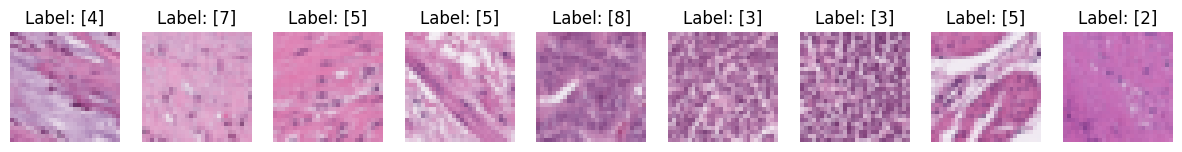

In [ ]:
# subset of images to visualize for PathMNIST dataset         (optional tried to visualize by the labels)
num_images_to_visualize = 10
subset_images = []
subset_labels = []
desired_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Desired labels from 1 to 9

# Filter images and labels based on desired labels
for img, label in zip(pathmnist_train.imgs, pathmnist_train.labels):
    if label in desired_labels:
        subset_images.append(img)
        subset_labels.append(label)

# Plot the subset of images along with their labels
fig, axes = plt.subplots(1, len(desired_labels), figsize=(15, 3))
for i in range(len(desired_labels)):
    axes[i].imshow(subset_images[i], cmap='gray')
    axes[i].set_title(f"Label: {subset_labels[i]}")
    axes[i].axis('off')

plt.show()


In [ ]:
#to check repeated labels(optional)
num_images_to_visualize = 10
import numpy as np

# Count occurrences of each label
unique_labels, label_counts = np.unique(subset_labels, return_counts=True)

# Print unique labels and their counts
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: Count {count}")


Label 1: Count 9509
Label 2: Count 10360
Label 3: Count 10401
Label 4: Count 8006
Label 5: Count 12182
Label 6: Count 7886
Label 7: Count 9401
Label 8: Count 12885


**d)The data is pre-processed with data augmentation to improve the overall performance.**

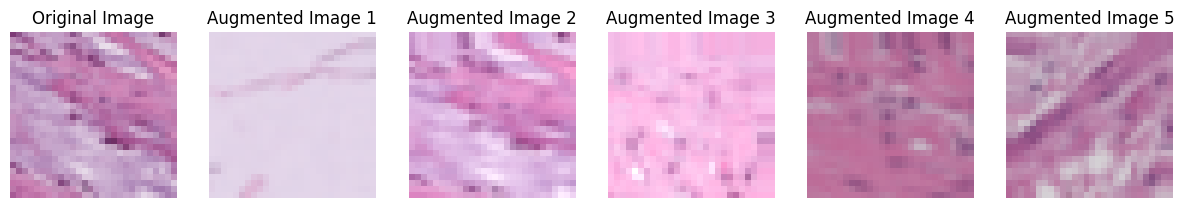

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Data augmentation parameters for PathMNIST
pathmnist_datagen_params = dict(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

#data generator for PathMNIST
pathmnist_datagen = ImageDataGenerator(**pathmnist_datagen_params)

#image index to display
image_index = 1

#augmented images for PathMNIST
pathmnist_train_images = pathmnist_train.imgs
pathmnist_augmented_images = [next(pathmnist_datagen.flow(np.expand_dims(img, axis=0)))[0] for img in pathmnist_train_images]

#original image and its augmented versions
original_image = pathmnist_train_images[image_index]
augmented_images = pathmnist_augmented_images[:5]

# Plot original image and its augmented versions
fig, axes = plt.subplots(1, len(augmented_images) + 1, figsize=(15, 5))

# Plot original image
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot augmented images
for i, augmented_image in enumerate(augmented_images):
    axes[i + 1].imshow(augmented_image.astype('uint8'), cmap='gray')
    axes[i + 1].set_title(f"Augmented Image {i+1}")
    axes[i + 1].axis('off')

plt.show()


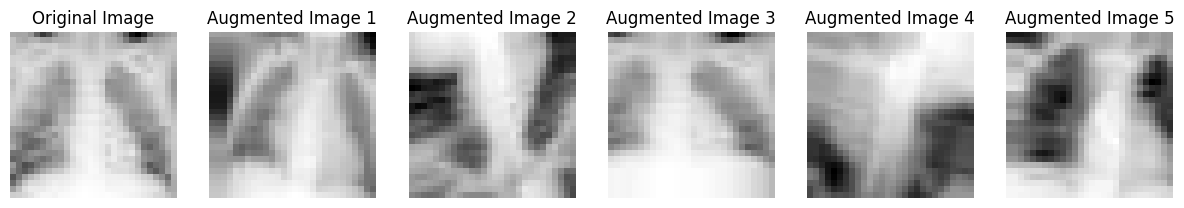

In [4]:
# Data augmentation parameters for PneumoniaMNIST
pneumoniamnist_datagen_params = dict(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3]
)

#data generator for PneumoniaMNIST
pneumoniamnist_datagen = ImageDataGenerator(**pneumoniamnist_datagen_params)

#image index to display
image_index = 1

#augmented images for PneumoniaMNIST
pneumoniamnist_train_images = pneumoniamnist_train.imgs
pneumoniamnist_augmented_images = [next(pneumoniamnist_datagen.flow(np.expand_dims(img, axis=(0, 3)), batch_size=1))[0] for img in pneumoniamnist_train_images]

#original image and its augmented versions from PneumoniaMNIST
original_pneumoniamnist_image = pneumoniamnist_train_images[2]
augmented_pneumoniamnist_images = pneumoniamnist_augmented_images[:5]

# Plot original image and its augmented versions for PneumoniaMNIST
fig2, axes2 = plt.subplots(1, len(augmented_pneumoniamnist_images) + 1, figsize=(15, 5))

# Plot original image for PneumoniaMNIST
axes2[0].imshow(original_pneumoniamnist_image.squeeze(), cmap='gray')
axes2[0].set_title("Original Image")
axes2[0].axis('off')

# Plot augmented images for PneumoniaMNIST
for i, augmented_image in enumerate(augmented_pneumoniamnist_images):
    axes2[i + 1].imshow(augmented_image.squeeze().astype('uint8'), cmap='gray')
    axes2[i + 1].set_title(f"Augmented Image {i+1}")
    axes2[i + 1].axis('off')

plt.show()


**e)Spliting data for training and testing for classification. Considering classes for each of the datasets also considering issue that we may have imbalanced data**

In [5]:
from sklearn.model_selection import train_test_split

# Flatten labels
pathmnist_train_labels_flat = np.ravel(pathmnist_train.labels)
pathmnist_test_labels_flat = np.ravel(pathmnist_test.labels)
pneumoniamnist_train_labels_flat = np.ravel(pneumoniamnist_train.labels)
pneumoniamnist_test_labels_flat = np.ravel(pneumoniamnist_test.labels)

#shape and type of the labels after flattening
print("Shape of pathmnist_train_labels after flattening:", pathmnist_train_labels_flat.shape)
print("Type of pathmnist_train_labels after flattening:", type(pathmnist_train_labels_flat))

# Split PathMNIST dataset
pathmnist_train_images, pathmnist_test_images, pathmnist_train_labels, pathmnist_test_labels = train_test_split(
    pathmnist_train.imgs, pathmnist_train_labels_flat, test_size=0.2, stratify=pathmnist_train_labels_flat, random_state=42)

# Split PneumoniaMNIST dataset
pneumoniamnist_train_images, pneumoniamnist_test_images, pneumoniamnist_train_labels, pneumoniamnist_test_labels = train_test_split(
    pneumoniamnist_train.imgs, pneumoniamnist_train_labels_flat, test_size=0.2, stratify=pneumoniamnist_train_labels_flat, random_state=42)

#class distribution in the training and testing sets
print("PathMNIST Train Class Distribution:", np.bincount(pathmnist_train_labels))
print("PathMNIST Test Class Distribution:", np.bincount(pathmnist_test_labels))
print("PneumoniaMNIST Train Class Distribution:", np.bincount(pneumoniamnist_train_labels))
print("PneumoniaMNIST Test Class Distribution:", np.bincount(pneumoniamnist_test_labels))


Shape of pathmnist_train_labels after flattening: (89996,)
Type of pathmnist_train_labels after flattening: <class 'numpy.ndarray'>
PathMNIST Train Class Distribution: [ 7493  7607  8288  8320  6405  9745  6309  7521 10308]
PathMNIST Test Class Distribution: [1873 1902 2072 2081 1601 2437 1577 1880 2577]
PneumoniaMNIST Train Class Distribution: [ 971 2795]
PneumoniaMNIST Test Class Distribution: [243 699]


**f)Building and train deep learning models with Keras. Two models for PathMNIST  and two for the PneumoniaMNIST dataset that consider the problem as classification.**

**`Creating Own Model`**

**1. Base Model for Pathminst and Pneumoniaminst.**





In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize

In [7]:
# CNN architecture for PathMNIST
def opathmnist_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.BatchNormalization(input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# CNN architecture for PneumoniaMNIST
def opneumoniamnist_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.BatchNormalization(input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Setting input shape and number of classes
input_shape_pathmnist = (28, 28, 1)  # Input shape for PathMNIST
input_shape_pneumoniamnist = (28, 28, 3)  # Input shape for PneumoniaMNIST
num_classes_pathmnist = 9  # Number of classes for PathMNIST
num_classes_pneumoniamnist = 2  # Number of classes for PneumoniaMNIST

# Creating models
pathmnist_model = opathmnist_model(input_shape_pathmnist, num_classes_pathmnist)
pneumoniamnist_model = opneumoniamnist_model(input_shape_pneumoniamnist, num_classes_pneumoniamnist)


**2.Define,Compile and Train Model**

**1.For Pathminst**

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Again Augmentation Parameters
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

#model architecture for PathMNIST
pathmnist_model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # Assuming there are 9 classes in PathMNIST
])

# Compile model for PathMNIST
pathmnist_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Trainmodel for PathMNIST with data augmentation
pathmnist_history = pathmnist_model.fit(
    datagen.flow(pathmnist_train_images, pathmnist_train_labels, batch_size=64),  # Increased batch size
    steps_per_epoch=len(pathmnist_train_images) / 64,
    epochs=10,
    validation_data=(pathmnist_test_images, pathmnist_test_labels)
)

# training accuracy
train_loss, train_accuracy = pathmnist_model.evaluate(pathmnist_train_images, pathmnist_train_labels, verbose=0)
print("Training Accuracy:", train_accuracy)

# testing accuracy
test_loss, test_accuracy = pathmnist_model.evaluate(pathmnist_test_images, pathmnist_test_labels, verbose=0)
print("Testing Accuracy:", test_accuracy)


Epoch 1/10
1124/1124 [==============================] - 125s 108ms/step - loss: 1.8478 - accuracy: 0.4001 - val_loss: 1.5571 - val_accuracy: 0.4363
Epoch 2/10
1124/1124 [==============================] - 108s 96ms/step - loss: 1.1417 - accuracy: 0.5711 - val_loss: 1.0889 - val_accuracy: 0.6136
Epoch 3/10
1124/1124 [==============================] - 109s 97ms/step - loss: 0.9178 - accuracy: 0.6671 - val_loss: 1.2021 - val_accuracy: 0.5963
Epoch 4/10
1124/1124 [==============================] - 109s 97ms/step - loss: 0.7842 - accuracy: 0.7179 - val_loss: 0.8753 - val_accuracy: 0.6895
Epoch 5/10
1124/1124 [==============================] - 111s 99ms/step - loss: 0.7397 - accuracy: 0.7334 - val_loss: 1.1321 - val_accuracy: 0.6248
Epoch 6/10
1124/1124 [==============================] - 129s 115ms/step - loss: 0.6805 - accuracy: 0.7553 - val_loss: 0.7438 - val_accuracy: 0.7510
Epoch 7/10
1124/1124 [==============================] - 134s 119ms/step - loss: 0.6705 - accuracy: 0.7617 - val_loss

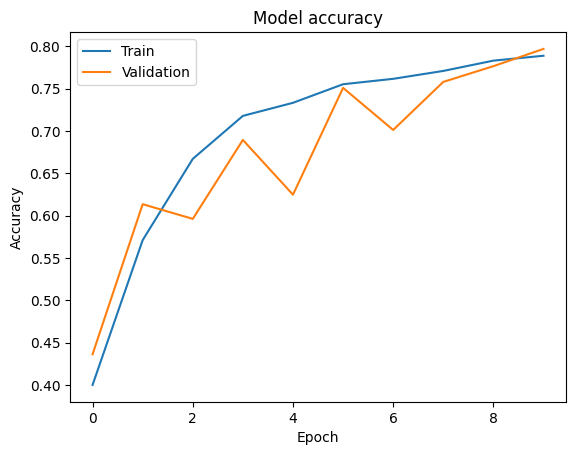

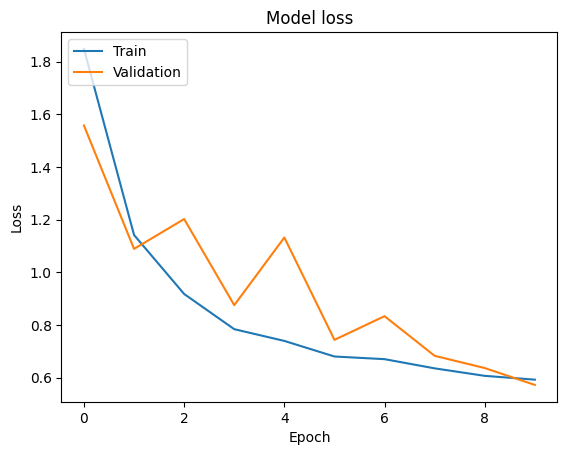

In [23]:
import matplotlib.pyplot as plt

#training & validation accuracy values
plt.plot(pathmnist_history.history['accuracy'])
plt.plot(pathmnist_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#training & validation loss values
plt.plot(pathmnist_history.history['loss'])
plt.plot(pathmnist_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [24]:
#training & validation accuracy values in numberic
print("Training Accuracy Values:", pathmnist_history.history['accuracy'])
print("Validation Accuracy Values:", pathmnist_history.history['val_accuracy'])

#training & validation loss values in numberic
print("Training Loss Values:", pathmnist_history.history['loss'])
print("Validation Loss Values:", pathmnist_history.history['val_loss'])


Training Accuracy Values: [0.400133341550827, 0.571142852306366, 0.6671342849731445, 0.7179009914398193, 0.7333601713180542, 0.7552919387817383, 0.7616811990737915, 0.7710011601448059, 0.7831684947013855, 0.788932740688324]
Validation Accuracy Values: [0.4363333284854889, 0.613611102104187, 0.5962777733802795, 0.6894999742507935, 0.624833345413208, 0.7509999871253967, 0.7012777924537659, 0.758055567741394, 0.7766110897064209, 0.796999990940094]
Training Loss Values: [1.8477693796157837, 1.14167320728302, 0.9178239107131958, 0.7842409610748291, 0.7396842241287231, 0.6805461645126343, 0.6704785823822021, 0.6355540156364441, 0.6071092486381531, 0.5926806330680847]
Validation Loss Values: [1.557070255279541, 1.088942050933838, 1.2021178007125854, 0.8752806782722473, 1.1321109533309937, 0.7437759637832642, 0.8335883617401123, 0.6830971837043762, 0.6367554068565369, 0.5727035999298096]


**2.For PneumoniaMinst**

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

#model architecture for PneumoniaMNIST
pneumoniamnist_model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile model for PneumoniaMNIST
pneumoniamnist_model.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train model for PneumoniaMNIST
pneumoniamnist_history = pneumoniamnist_model.fit(
    pneumoniamnist_train_images,
    pneumoniamnist_train_labels,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
95/95 [==============================] - 5s 37ms/step - loss: 1.8928 - accuracy: 0.8695 - val_loss: 0.1691 - val_accuracy: 0.9231
Epoch 2/10
95/95 [==============================] - 4s 39ms/step - loss: 0.1681 - accuracy: 0.9309 - val_loss: 0.1926 - val_accuracy: 0.9111
Epoch 3/10
95/95 [==============================] - 3s 27ms/step - loss: 0.1764 - accuracy: 0.9319 - val_loss: 0.1852 - val_accuracy: 0.9363
Epoch 4/10
95/95 [==============================] - 2s 26ms/step - loss: 0.1670 - accuracy: 0.9366 - val_loss: 0.1286 - val_accuracy: 0.9483
Epoch 5/10
95/95 [==============================] - 3s 27ms/step - loss: 0.1300 - accuracy: 0.9499 - val_loss: 0.1300 - val_accuracy: 0.9469
Epoch 6/10
95/95 [==============================] - 3s 33ms/step - loss: 0.1296 - accuracy: 0.9495 - val_loss: 0.1053 - val_accuracy: 0.9589
Epoch 7/10
95/95 [==============================] - 3s 32ms/step - loss: 0.1066 - accuracy: 0.9612 - val_loss: 0.1897 - val_accuracy: 0.9178
Epoch 8/10
95

**g)Evaluating the performance of the models on the test dataset( F1, precision, recall, accuracy, confusion matrix, etc.)**

**1. For Pathminst:**

563/563 [==============================] - 9s 16ms/step
Test Accuracy: 0.797
Precision: 0.804855352477343
Recall: 0.797
F1 Score: 0.7933210532269994
Confusion Matrix:
[[1809   19    0    0   37    2    6    0    0]
 [  50 1797    3    0   34   10    0    6    2]
 [   9   13 1149   57   32  460   10  289   53]
 [   0    0   12 2055    1    0    7    0    6]
 [  42   32   18   13 1305   24   55   80   32]
 [  21    7   20    4   23 2143   10  193   16]
 [  14    0   76  178  167    2  988   10  142]
 [   2    5   87   34   38  515    2 1177   20]
 [   4    2  120  231   32   39   67  159 1923]]



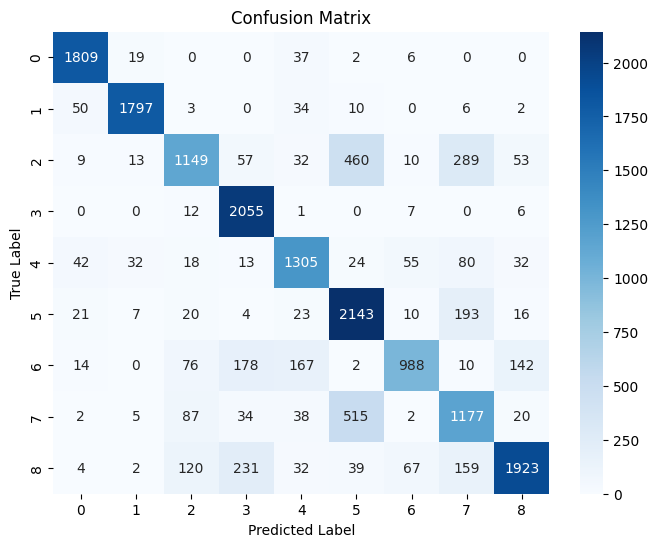

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#test data
test_probabilities = pathmnist_model.predict(pathmnist_test_images)
test_predictions = np.argmax(test_probabilities, axis=1)

#evaluation metrics
accuracy = accuracy_score(pathmnist_test_labels, test_predictions)
precision = precision_score(pathmnist_test_labels, test_predictions, average='weighted')
recall = recall_score(pathmnist_test_labels, test_predictions, average='weighted')
f1 = f1_score(pathmnist_test_labels, test_predictions, average='weighted')
conf_matrix = confusion_matrix(pathmnist_test_labels, test_predictions)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(9), yticklabels=range(9))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**2.For Pnemoniaminst**

30/30 [==============================] - 1s 16ms/step

Model: PneumoniaMNIST Model
Test Accuracy: 0.9171974522292994
Precision: 0.9342933861288608
Recall: 0.9171974522292994
F1 Score: 0.9202275467631421
Confusion Matrix:
[[239   4]
 [ 74 625]]


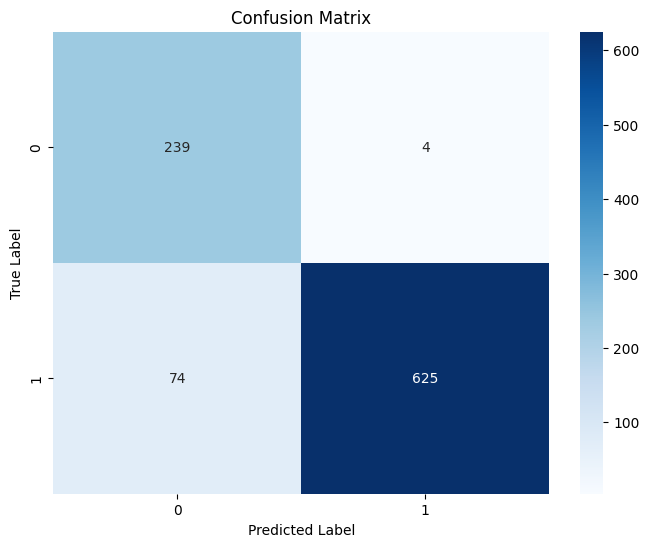

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to evaluate a model and return evaluation metrics
def evaluate_model(model, test_images, test_labels):
    # Predictions on test data
    test_predictions_probs = model.predict(test_images)
    test_predictions = np.argmax(test_predictions_probs, axis=1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(test_labels, test_predictions)
    precision = precision_score(test_labels, test_predictions, average='weighted')
    recall = recall_score(test_labels, test_predictions, average='weighted')
    f1 = f1_score(test_labels, test_predictions, average='weighted')
    conf_matrix = confusion_matrix(test_labels, test_predictions)

    return accuracy, precision, recall, f1, conf_matrix

accuracy, precision, recall, f1, conf_matrix = evaluate_model(pneumoniamnist_model, pneumoniamnist_test_images, pneumoniamnist_test_labels)
print("\nModel: PneumoniaMNIST Model")
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(2), yticklabels=range(2))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
